# Random Forest

### Algorithm
1. Build a boostrap dataset
    + Sample, with replacement, $n$ training examples from $X$, $Y$; call these $X_b$, $Y_b$
    + $X_b$ and $Y_b$ is randomly sampled from $X$ and $Y$, but their sizes are the same. This means that $X_b$ and $Y_b$ might have the repeated entry and out-of-bag entry.
2. Train a classifier on the boostrap dataset $X_b$, $Yb$ with only a subset of features
    + the size of subset is determined by a hyperparameter called "max_depth"
    + In practical, we choose several candidates for "max_depth" and train multiple random forests. Then we compute their accuracy on out-of-bag entries and select the "max_depth" whose corresponding random forest yileding minimal error.
3. Repeat the steps above and get a list of classifiers
4. Predict a sample with all the classifiers and their average is the desired prediction



### Example of Random Forest with sklearn

0.7774302933175743
0.6213222552057729
0.5654299618867402
0.6017436126833549
0.6563808050787381
0.5733860087873761
0.647933455280104
0.4797270487269829


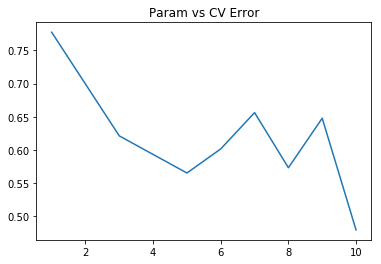

(0, 0, 0) => 0.7954761904761906
(0, 0, 1) => 1.0854761904761905
(0, 1, 0) => 1.349365079365079
(1, 0, 0) => 1.2323015873015872
(1, 1, 0) => 1.786190476190476
(1, 0, 1) => 1.5223015873015875
(0, 1, 1) => 1.6393650793650794
(1, 1, 1) => 2.0761904761904764


In [1]:
%matplotlib inline
import numpy as np

# build X_train and y_train
X_train=np.array([[0,0,0],
                [0,0,1],
                [0,1,0],
                [1,0,0],
                [1,1,0],
                [1,0,1],
                [0,1,1],
                [1,1,1],])
y_train=np.array([0,1,1,1,2,2,2,3])


# build a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Random Forest ( depth)
params = [1,3,5,6,7,8,9,10] # check for each depth to find out which one performs best
test_scores = [] # get score for each depth (designed to find out which one performs best)
for param in params:
    clf = RandomForestRegressor(n_estimators=30,max_depth=param) # construct a classifier
    test_score = np.mean(np.sqrt(-cross_val_score(clf, X_train, y_train, scoring='neg_mean_squared_error',cv=5))) # put the training data in and cal the cost
    print(test_score)
    test_scores.append(test_score) # cal the average costimport 

# find out which depth is best
import matplotlib.pyplot as plt # draw
plt.figure()
plt.title("Param vs CV Error")
plt.plot(params, test_scores)
plt.show()

rf = RandomForestRegressor(n_estimators=30, max_depth=1) # construct a classifier
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_train)

for i in range(len(X_train)):
    print('({}, {}, {}) => {}'.format(X_train[i, 0], X_train[i, 1], X_train[i, 2], y_predicted[i]))